## Template Waveforms

In [1]:
# feel free to change according to your needs

# define session
#data_prefix = "/adata/electro/bt0975/bt0975-23092021-0105/" 
#data_prefix = "/adata/electro/pk1330/pk1330-12112021-0101/"  
#data_prefix = "/adata/electro/pk1330/pk1330-10112021-0101/" 
#data_prefix = "/adata/electro/pk1331/pk1331-23112021-0101_A/" 
data_prefix = "/adata/electro/pk1331/pk1331-24112021-0101/"



In [2]:
import numpy as np
import matplotlib.pyplot as plt

# load templates
templates = np.load(data_prefix + "templates.npy")
n_clusters, n_timepoints, n_channels = templates.shape
print("Clusters:",n_clusters, "timepoints:",n_timepoints,", Channels:",n_channels)


Clusters: 59 timepoints: 82 , Channels: 32


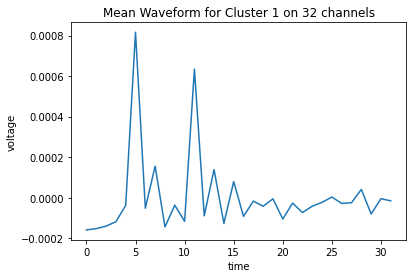

In [14]:
# select a cluster you want to work on
#cluster = 0 # which cluster to analyze
#cluster = 16
cluster = 1

# get the data for that specific cluster (turns 3 dimensions to 2 dimensions by projecting on that component)
template_cluster = templates[cluster]

# plot mean waveform of all channels
mean_waveform = np.mean(template_cluster, axis=0)

plt.plot(mean_waveform)
plt.title("Mean Waveform for Cluster "+str(cluster)+" on "+str(n_channels)+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()


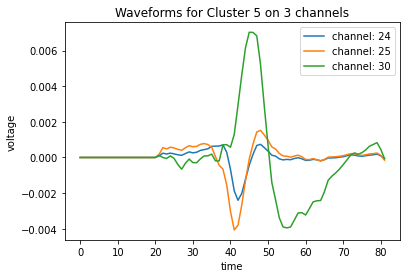

In [4]:
# select some channels
channels = [24,25,30]

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


In [15]:
# ----------------------------------------------------

# get map that puts each spike to its associated template

st = np.load(data_prefix+"spike_templates.npy")

print("There are",len(st),"spikes in total and",len(np.unique(st)),"assignments to templates.")

diffclusters = list(set(range(n_clusters)) - set(np.unique(st)))
print("Clusters not used (",len(diffclusters),"):",diffclusters)

# get index of spikes that were assigned that cluster
spikes_in_cluster = np.where(st==cluster)[0]
print("In that cluster (",cluster,") there are",len(spikes_in_cluster),"spikes.")

# get the corresponding amplitudes
amplitudes = np.load(data_prefix+"amplitudes.npy")
amplitudes_of_spikes_in_cluster = amplitudes[spikes_in_cluster]
mean_amplitude = np.mean(amplitudes_of_spikes_in_cluster)
print("The mean amplitude is",mean_amplitude)


There are 230293 spikes in total and 53 assignments to templates.
Clusters not used ( 6 ): [36, 41, 42, 43, 45, 46]
In that cluster ( 1 ) there are 2494 spikes.
The mean amplitude is 12.12641518003193


In [16]:
# translate the channels by map

cm = np.load(data_prefix + "channel_map.npy").flatten()

print("channel map:",cm)


channel map: [31 17 30 16 29 25 27 26 18 28 20 24 21 19 22 23  3 13  7 11 12 10  8  9
 14  0 15  1  6  2  5  4]


In [17]:
def get_channels_from_cluster(c):
    # get peak to peak amplitude for each channel
    template_cluster = templates[c]
    amps = np.ptp(template_cluster,axis=0)
    channel_amps = np.array([range(n_channels),amps]).T
    channel_amps = np.flip(sorted(channel_amps, key=lambda x: x[1]))
    channels_with_highest_amp = channel_amps[:5,1]
    channels = channels_with_highest_amp.astype(int)
    return(channels)

for c in range(n_clusters):
    channels = get_channels_from_cluster(c)
    channels_mapped = cm[channels]
    print("cluster",c,": channels:",channels,", mapped=",channels_mapped)


cluster 0 : channels: [ 3  8 10  2 12] , mapped= [16 18 20 30 21]
cluster 1 : channels: [ 5 11  9  7 13] , mapped= [25 24 28 26 19]
cluster 2 : channels: [ 7  6 13 20 19] , mapped= [26 27 19 12 11]
cluster 3 : channels: [ 8 10 12  0  2] , mapped= [18 20 21 31 30]
cluster 4 : channels: [10  8 21 29 30] , mapped= [20 18 10  2  5]
cluster 5 : channels: [11  5  9  7 28] , mapped= [24 25 28 26  6]
cluster 6 : channels: [11  5  9 12  8] , mapped= [24 25 28 21 18]
cluster 7 : channels: [12 10  0  7 31] , mapped= [21 20 31 26  4]
cluster 8 : channels: [14 10  8 12  0] , mapped= [22 20 18 21 31]
cluster 9 : channels: [17 23 19 27 18] , mapped= [13  9 11  1  7]
cluster 10 : channels: [17 23 21 19 25] , mapped= [13  9 10 11  0]
cluster 11 : channels: [17 23 19 29 26] , mapped= [13  9 11  2 15]
cluster 12 : channels: [18 22 20 28 23] , mapped= [ 7  8 12  6  9]
cluster 13 : channels: [18 22 16 20  3] , mapped= [ 7  8  3 12 16]
cluster 14 : channels: [18 22 20 16 28] , mapped= [ 7  8 12  3  6]
clust

channels for cluster 1 : [ 5 11  9  7 13]


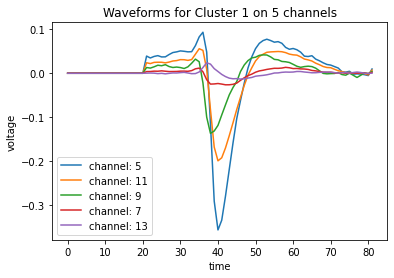

In [20]:
# plot channels with hightest amplitude

channels = get_channels_from_cluster(cluster)
print("channels for cluster",cluster,":",channels)

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


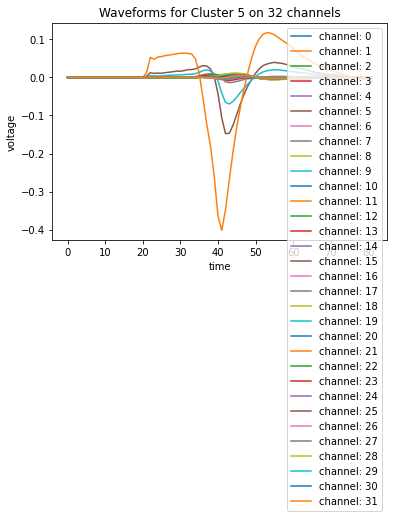

In [9]:
# plot all channels
channels = range(n_channels)

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


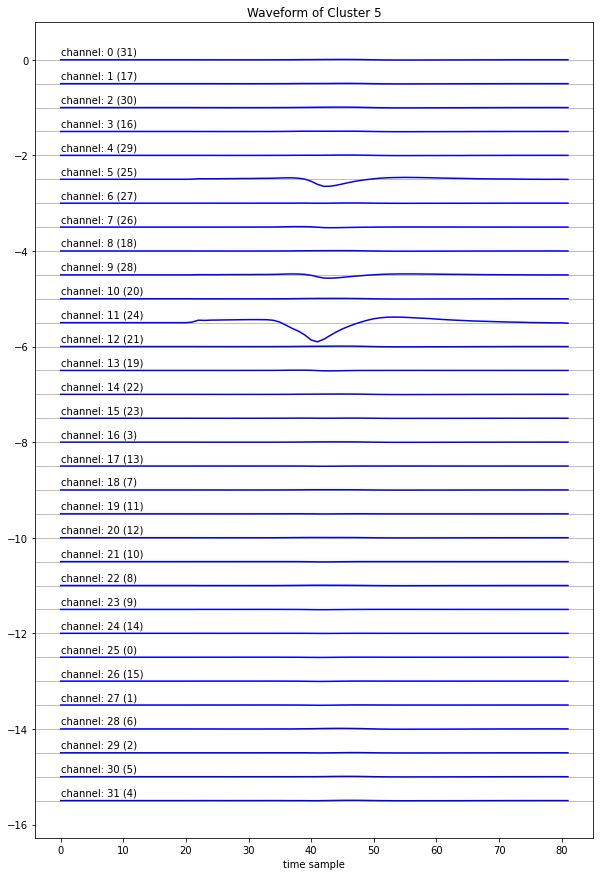

'\n\n## (same using subplots)\n\n# plot all channels\nchannels = range(n_channels)\n\nfig, ax = plt.subplots(nrows=n_channels, sharex=True, figsize=(10,20))\n\nfor i,channel in enumerate(channels):\n    ax[i].plot( template_cluster[:,channel] , label="channel: "+str(channel) , color="blue")\n    ax[i].set_ylabel(i)\nplt.xlabel("time sample")\nplt.yticks([])\nplt.show()\n'

In [10]:
# plot all channels
channels = range(n_channels)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels):
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(cm[channel])+")"
    plt.plot( template_cluster[:,channel] -i*.5 , label=label , color="blue")
    plt.text( s= label , x=0, y=-i*.5 +.1 )
plt.xlabel("time sample")
#plt.legend()
plt.title("Waveform of Cluster "+str(cluster))
plt.show()


'''

## (same using subplots)

# plot all channels
channels = range(n_channels)

fig, ax = plt.subplots(nrows=n_channels, sharex=True, figsize=(10,20))

for i,channel in enumerate(channels):
    ax[i].plot( template_cluster[:,channel] , label="channel: "+str(channel) , color="blue")
    ax[i].set_ylabel(i)
plt.xlabel("time sample")
plt.yticks([])
plt.show()
'''

## Channel position (alignment)

channel: 0  ( 31 ), position: [ 1. 33.] ,  amplitude: 0.032170765
channel: 1  ( 17 ), position: [ 1. 32.] ,  amplitude: 0.030024782
channel: 2  ( 30 ), position: [ 1. 31.] ,  amplitude: 0.030832823
channel: 3  ( 16 ), position: [ 1. 30.] ,  amplitude: 0.024111142
channel: 4  ( 29 ), position: [ 1. 29.] ,  amplitude: 0.027132196
channel: 5  ( 25 ), position: [ 1. 28.] ,  amplitude: 0.4485826
channel: 6  ( 27 ), position: [ 1. 27.] ,  amplitude: 0.013222656
channel: 7  ( 26 ), position: [ 1. 26.] ,  amplitude: 0.039644208
channel: 8  ( 18 ), position: [ 2. 25.] ,  amplitude: 0.029706575
channel: 9  ( 28 ), position: [ 2. 24.] ,  amplitude: 0.17817225
channel: 10  ( 20 ), position: [ 2. 23.] ,  amplitude: 0.023861852
channel: 11  ( 24 ), position: [ 2. 22.] ,  amplitude: 0.2543824
channel: 12  ( 21 ), position: [ 2. 21.] ,  amplitude: 0.022814449
channel: 13  ( 19 ), position: [ 2. 20.] ,  amplitude: 0.036975425
channel: 14  ( 22 ), position: [ 2. 19.] ,  amplitude: 0.024961032
channel: 1

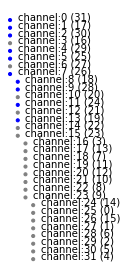

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

cp = np.load(data_prefix + "channel_positions.npy")

template_cluster = templates[cluster]
amps = np.ptp(template_cluster,axis=0)


for channel, position, amp in zip(range(n_channels), cp, amps):
    print("channel:",channel," (",cm[channel],"), position:",position, ",  amplitude:",amp)
    
    r=0.2
    #r=amp*5.
    #color = 'blue' if channel in channels else 'gray'
    color = 'blue' if amp>.025 else 'gray'
    
    circle = plt.Circle((position[0], position[1]), r, color=color)
    ax.add_patch(circle)
    
    plt.text(x=position[0]+1, y=position[1], s="channel:"+str(channel)+" ("+str(cm[channel])+")")
    

ax.axis('off')
ax.axis('scaled') #this line fits your images to screen 

#ax.autoscale(enable=True) 
plt.tight_layout()
plt.show()




## Spike Templates and Clusters
reference: [phy](https://github.com/kwikteam/phy-contrib/blob/master/docs/template-gui.md#concepts)

In [12]:
# find the difference in templates & clusters after Phy post-processing


import numpy as np

# spike templates
st = np.load(data_prefix + "spike_templates.npy")[:,0]

# spike clusters
sc = np.load(data_prefix + "spike_clusters.npy")



In [13]:
for s in np.unique(st):
    print("template:",s)
    s_ind = np.where(st==s)
    s_clus = sc[s_ind]
    unique, counts = np.unique(s_clus, return_counts=True)
    print(dict(zip(unique, counts)))
    ###if len(unique)
    print(".\n")

template: 0
{0: 1805}
.

template: 1
{1: 2494}
.

template: 2
{2: 39}
.

template: 3
{3: 1471}
.

template: 4
{4: 1102}
.

template: 5
{5: 6273}
.

template: 6
{6: 2468}
.

template: 7
{7: 174}
.

template: 8
{8: 2362}
.

template: 9
{9: 241}
.

template: 10
{10: 106}
.

template: 11
{11: 141}
.

template: 12
{12: 494}
.

template: 13
{13: 205}
.

template: 14
{14: 533}
.

template: 15
{15: 2760}
.

template: 16
{16: 494}
.

template: 17
{17: 960}
.

template: 18
{18: 2779}
.

template: 19
{19: 1623}
.

template: 20
{63: 8234}
.

template: 21
{63: 7443}
.

template: 22
{22: 73}
.

template: 23
{23: 2990}
.

template: 24
{24: 17897}
.

template: 25
{25: 7210}
.

template: 26
{26: 6983}
.

template: 27
{27: 2351}
.

template: 28
{28: 465}
.

template: 29
{29: 502}
.

template: 30
{30: 334}
.

template: 31
{31: 25741}
.

template: 32
{32: 17}
.

template: 33
{33: 463}
.

template: 34
{34: 45}
.

template: 35
{35: 133}
.

template: 37
{37: 35}
.

template: 38
{38: 41}
.

template: 39
{39: 